In [1]:
from mfpfile import MFPFile

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib notebook

## Read File

In [4]:
multiple_2D = MFPFile('example_multiple_2D.ibw')

## Parameters get dumped into dictionary:

In [5]:
print(multiple_2D.parameters)

{'MostPosZVoltage': ' 150', 'ARDFForceMap': '1', 'NumOfSegments': '4', 'Direction': ' Nan,1,0,-1,0,', 'VerDate': '140134', 'Version': '14.13.134', 'XOPVersion': '20132.34.21.0', 'OSVersion': 'Windows 7 Professional Service Pack 1 (Build 7601)', 'IgorFileVersion': '6.3.7.2', 'XLVDT': '3.5308e-06', 'YLVDT': '-6.4641e-06', 'ARDoIVCurve': '0', 'ForceNote': '', 'TipSerialNumber': '', 'ForceMapNote': '', 'MostNegZvoltage': ' -10', 'ExtendZ': ' 1.0745e-05', 'RetractZ': ' -7.1631e-07', 'StartDist': ' 4.1663e-06', 'ForceDist': ' 1e-06', 'ForceDistSign': ' 1', 'VelocitySynch': ' 0', 'Velocity': ' 1.9841e-06', 'ApproachVelocity': ' 4.9814e-07', 'RetractVelocity': ' 9.9946e-07', 'ForceScanRate': ' 0.33245', 'ApproachScanRate': ' 1', 'RetractScanRate': ' 1', 'UseVelocity': ' 0', 'DwellSetting': ' 1', 'DwellTime': ' 10', 'DwellTime1': ' 0.992', 'DwellRate': ' 10', 'HamSensPercent': ' 1', 'HamSens': ' 1e-06', 'HamWhich': ' 0', 'LastKnownZDist': ' 1e-06', 'UsePerDist': ' 0', 'ForceFilterBW': ' 1000', 

### They are stored as strings, if you need any as numerical values, convert them:

In [6]:
points_per_second = int(multiple_2D.parameters['NumPtsPerSec'])
print(points_per_second)

2000


## Access Data via `[ ]`-Operator, also known as `__getitem__`

### You can use indices...

In [7]:
multiple_2D[1]

array([-1.7813737e-07, -1.7784357e-07, -1.7748403e-07, ...,
       -1.7874129e-07, -1.7964184e-07, -1.7951054e-07], dtype=float32)

### ... which should match the order of the labels in the following list:

In [8]:
multiple_2D.label_list

['Raw', 'Defl', 'ZSnsr']

### Or you can use labels directly:

In [9]:
multiple_2D['Defl']

array([-1.7813737e-07, -1.7784357e-07, -1.7748403e-07, ...,
       -1.7874129e-07, -1.7964184e-07, -1.7951054e-07], dtype=float32)

In [10]:
multiple_2D['Defl'].all() == multiple_2D[1].all()

True

## To force from deflection, use conversion parameters

In [11]:
conv = multiple_2D.get_conversion_parameters()

In [12]:
print(conv)

{'volts_to_meter': 7.473e-08, 'spring_constant': 0.013394}


### Actually, you only need spring constant apparently

In [13]:
force = multiple_2D['Defl'] * conv['spring_constant']

In [14]:
print(force)

[-2.3859719e-09 -2.3820368e-09 -2.3772211e-09 ... -2.3940607e-09
 -2.4061229e-09 -2.4043640e-09]


<IPython.core.display.Javascript object>


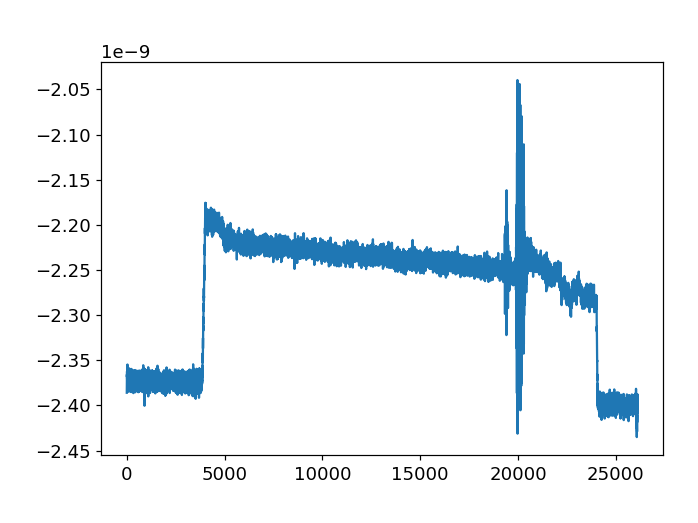

In [15]:
plt.figure()
plt.plot(force)
plt.show()

### I added the label `'time'` as well

In [9]:
multiple_2D['time']

array([0.00000e+00, 5.00000e-04, 1.00000e-03, ..., 1.30595e+01,
       1.30600e+01, 1.30605e+01])

### You can pass a second parameter (`int`), which is the segment index

In [16]:
multiple_2D['Defl', 1].shape

(20000,)

In [17]:
multiple_2D['Defl'].shape

(26122,)

### I am not 100% sure, but I think in usual force distance curves, the segments are: 0 = Approach, 1 = Pause, 2 = Retract, (3 = Positioning of canti lever in case of force map)

### Print number of segments as read from header of file:

In [18]:
multiple_2D.n_segments

4

### Here is a plot of the different segments:

<IPython.core.display.Javascript object>


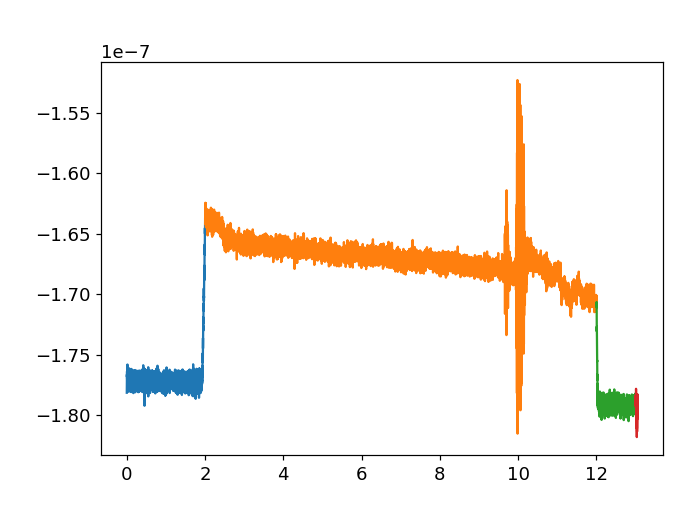

In [19]:
plt.figure()
plt.plot(multiple_2D['time', 0], multiple_2D['Defl', 0])
plt.plot(multiple_2D['time', 1], multiple_2D['Defl', 1])
plt.plot(multiple_2D['time', 2], multiple_2D['Defl', 2])
plt.plot(multiple_2D['time', 3], multiple_2D['Defl', 3])
plt.show()

## Let's have a look at a force map

In [20]:
fmap = MFPFile('example_map.ibw')

### The ibw file is interpreted as a map, if the data array has 3 dimensions instead of two:

In [21]:
fmap.wave_data.shape

(256, 256, 3)

In [22]:
multiple_2D.wave_data.shape

(26122, 3)

In [23]:
print(fmap.is_mfp_map(), multiple_2D.is_mfp_map())

True False


## Maps usually have different labels, and an error occurs if you want to get the time stamp array as before:

In [24]:
print(fmap.label_list)

['HeightTrace', 'DeflectionTrace', 'LateralTrace']


In [25]:
fmap['time']

RuntimeError: can't get time stamp array for maps

### Then there are some ibw files of recordings with MFP, that contain only one set of data, and no labels:

In [26]:
single_dataset = MFPFile('example_single_2D.ibw')

No Parameter labeled NumOfSegments found, will try to infer number of segments from list of segment indices


### So you can't access data by any label, and you can only use 0 as index

In [27]:
single_dataset[0]

array([ 1.5607317e-09,  1.5562597e-09,  1.7306681e-09, ...,
       -4.9192117e-10, -6.1266547e-10, -6.7527361e-10], dtype=float32)

### which is the same as:

In [28]:
single_dataset.wave_data

array([ 1.5607317e-09,  1.5562597e-09,  1.7306681e-09, ...,
       -4.9192117e-10, -6.1266547e-10, -6.7527361e-10], dtype=float32)

### There seem to be segments though, so you can still use segment indices:

In [30]:
print(single_dataset[0].shape)
print(single_dataset[0, 2].shape)

(38981,)
(12496,)
